In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests as re
import tweepy
import json
import seaborn as sb

### Gather Data

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# response = re.get(url)

# image = pd.read_csv('image_predictions.tsv', sep = '\t')
image = pd.read_csv(url, sep ='\t')

In [ ]:
consumer_key = '**HIDDEN**'
consumer_secret = '**HIDDEN**'
access_token = '**HIDDEN**'
access_secret = '**HIDDEN**'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth)

In [ ]:
tweet_json = api.get_status(id, tweet_mode='extended')

#### The error above shows that I have not been authorised

In [ ]:
for tweet_id in twitter['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        with open('tweet_json.txt', 'a+') as file:
            json.dump(tweet._json, file)
            file.write('\n')
        print (tweet_id, 'success')
    except:
        print (tweet_id, 'Failed')

##### Alternatively using the downloaded file since I have not yet been authorized by twitter's team

In [3]:
# twit = pd.read_json('tweet_json.txt')
# print(twit.to_string())

twit = []
with open('tweet-json copy') as f:
    for line in f:
        jsonData = json.loads(line)
        twit.append(jsonData)
        #print (pd.DataFrame(jsonData))
tweet_json = pd.DataFrame(twit, columns = ['id', 'retweet_count', 'favorite_count'])



### Assessing the data

In [4]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [5]:
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [8]:
twitter.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [9]:
twitter.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [10]:
twitter.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [12]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet_json.duplicated().unique()

array([False])

In [14]:
image.duplicated().unique()

array([False])

In [15]:
twitter.duplicated().unique()

array([False])

In [16]:
twitter.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Quality Issues

- There are missing values in some columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.

- predictions 2 and 3 are not necessary as they are like repetition
- the timestamp is also having a wrong datatype. It should be datetime
- The source column is too messy : renaming with a simple text from the whole text
- Columns with retweets are not necessary
- Some names are not correct based on the context of the text, these includes: 'by', 'officially', 'None', 'a', 'not','mia', 'one', 'Mo', 'incredibly'
- Any "None" string values in dataframe should be NaN instead to indicate values that are not available
- img_num, p1_conf should be string.

### Tidy Issues

- doggo, floofer, pupper, and puppo should be under the category datatype, they should be under the 'dog_stage' column
- merge twitter dataframe and image together 

In [ ]:
print("\n".join(twitter["text"].to_list())) # ref: https://stackoverflow.com/questions/68490745/how-to-display-the-full-text-of-a-column-in-pandas

In [ ]:
twitter['text'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

### Cleaning Dataset

#### Define: Creating a copy for each dataframe

In [18]:
twitter_clean = twitter.copy()
image_clean = image.copy()
tweet_json_clean = tweet_json.copy()

In [19]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
twitter_clean = twitter_clean[(twitter_clean['retweeted_status_id'].isna())]

In [21]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [22]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
tweet_json_clean

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Handling missing Data

#### 1 Dropping the missing values because the ratio is relatively small compared to the total dataset

In [24]:
twitter_clean = twitter_clean[twitter_clean['retweeted_status_id'].isna()]

In [25]:
twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'],  axis = 1, inplace = True)
image_clean.drop('jpg_url', axis = 1, inplace = True)
tweet_json_clean.drop('retweet_count', axis = 1, inplace = True)

#### To test if the columns with the missing data has been removed using .info() method

In [26]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


#### 2 Define: remove all p2's and p3's they seems like repetitions

In [27]:
image_clean.drop(["p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"],axis=1,inplace=True)

In [28]:
image_clean

,tweet_id,img_num,p1,p1_conf,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,redbone,0.506826,True
2,666033412701032449,1,German_shepherd,0.596461,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...
2070,891327558926688256,2,basset,0.555712,True
2071,891689557279858688,1,paper_towel,0.170278,False
2072,891815181378084864,1,Chihuahua,0.716012,True
2073,892177421306343426,1,Chihuahua,0.323581,True


#### 3 Define: Put all the doggo, floofer, pupper and puppo under the same category with the name dog_stage and replace all 'None' with NaN

In [29]:
#create a list for the dog stages
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
#create the column in twitter archive and replace none with nan
twitter_clean[dog_stages] = twitter_clean[dog_stages].replace('None', np.nan)
def join_all(x):
    return ','.join(x.dropna().astype(str))

twitter_clean['dog_stages'] = twitter_clean[dog_stages].apply(join_all, axis=1)
#replace empty string with nan
twitter_clean['dog_stages'] = twitter_clean['dog_stages'].replace('', np.nan)

In [30]:
twitter_clean.dog_stages.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [31]:
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [32]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   dog_stages          344 non-null    object
dtypes: int64(3), object(5)
memory usage: 152.9+ KB


In [33]:
twitter_clean.dog_stages.value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

#### 4 Changing tweet_id/id dataset to object and timestamp to datetime

In [34]:
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)
tweet_json_clean['id'] = tweet_json_clean['id'].astype(str)

In [35]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   favorite_count  2354 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.9+ KB


In [36]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   dog_stages          344 non-null    object
dtypes: int64(2), object(6)
memory usage: 152.9+ KB


In [37]:
twitter_clean['timestamp'] = twitter_clean['timestamp'].astype('datetime64[ns]')

In [38]:
twitter_clean['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2175 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2175 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.0 KB


#### 5 Cleaning the source column: renaming with a simple text from the whole text

In [39]:
twitter.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [40]:
twitter_clean['source'] = twitter_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', regex = True)
twitter_clean['source'] = twitter_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene', regex = True)
twitter_clean['source'] = twitter_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client', regex = True)
twitter_clean['source'] = twitter_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck', regex = True)

In [41]:
twitter_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### 6 Some names are not correct based on the context of the text, these includes: 'by', 'officially', 'None', 'a', 'not','mia', 'one', 'Mo', 'incredibly', etc




In [42]:
twitter_clean.loc[twitter_clean['name'].str.islower() == True, 'name'] =  np.nan

In [43]:
twitter_clean.replace('None', np.nan, inplace=True)

In [44]:
twitter_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


#### 7 img_num, p1_conf should be string.

In [45]:
image_clean['img_num'] = image_clean['img_num'].astype(str)
image_clean['p1_conf'] = image_clean['p1_conf'].astype(str)


### 8 Renaming id to tweet_id for consistency

In [46]:
tweet_json_clean.rename(columns = {'id' : 'tweet_id'}, inplace = True)

In [47]:
tweet_json_clean.head()

,tweet_id,favorite_count
0,892420643555336193,39467
1,892177421306343426,33819
2,891815181378084864,25461
3,891689557279858688,42908
4,891327558926688256,41048


#### Tidy 1 To merge twitter_clean and tweet_json_clean 

In [48]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                1391 non-null   object        
 7   dog_stages          344 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 152.9+ KB


In [49]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   img_num   2075 non-null   object
 2   p1        2075 non-null   object
 3   p1_conf   2075 non-null   object
 4   p1_dog    2075 non-null   bool  
dtypes: bool(1), object(4)
memory usage: 67.0+ KB


In [50]:
twitter_clean.tweet_id.duplicated().unique()

array([False])

In [51]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                1391 non-null   object        
 7   dog_stages          344 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 152.9+ KB


In [52]:
twitter_json = pd.merge(image_clean,twitter_clean, on="tweet_id",how='left')

In [53]:
twitter_json.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,NaN,NaN
1,666029285002620928,1,redbone,0.506826,True,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,NaN,NaN
2,666033412701032449,1,German_shepherd,0.596461,True,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9.0,10.0,NaN,NaN
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,NaN,NaN
4,666049248165822465,1,miniature_pinscher,0.560311,True,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,NaN,NaN


In [54]:
twitter_json.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', nan, 'TweetDeck'],
      dtype=object)

In [55]:
twitter_json = twitter_json.drop_duplicates()

In [56]:
twitter_json.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [57]:
twitter_json.drop_duplicates(inplace = True)

In [58]:
twitter_json.duplicated().unique()

array([False])

In [59]:
twitter_json.tweet_id.isnull().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [60]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   object        
 1   img_num             2075 non-null   object        
 2   p1                  2075 non-null   object        
 3   p1_conf             2075 non-null   object        
 4   p1_dog              2075 non-null   bool          
 5   timestamp           1994 non-null   datetime64[ns]
 6   source              1994 non-null   object        
 7   text                1994 non-null   object        
 8   rating_numerator    1994 non-null   float64       
 9   rating_denominator  1994 non-null   float64       
 10  name                1350 non-null   object        
 11  dog_stages          306 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(8)
memory usage: 196.6+ KB


### Tidy2 To make a master dataset

In [61]:
tidy_master_dataset = pd.merge(twitter_json, tweet_json_clean, how='left', on = 'tweet_id')

In [62]:
#tidy_master_dataset = 
tidy_master_dataset.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   object        
 1   img_num             2075 non-null   object        
 2   p1                  2075 non-null   object        
 3   p1_conf             2075 non-null   object        
 4   p1_dog              2075 non-null   bool          
 5   timestamp           1994 non-null   datetime64[ns]
 6   source              1994 non-null   object        
 7   text                1994 non-null   object        
 8   rating_numerator    1994 non-null   float64       
 9   rating_denominator  1994 non-null   float64       
 10  name                1350 non-null   object        
 11  dog_stages          306 non-null    object        
 12  favorite_count      2073 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(3), objec

In [63]:
tidy_master_dataset

,tweet_id,img_num,p1,p1_conf,p1_dog,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,NaN,NaN,2535.0
1,666029285002620928,1,redbone,0.506826,True,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,NaN,NaN,132.0
2,666033412701032449,1,German_shepherd,0.596461,True,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9.0,10.0,NaN,NaN,128.0
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,NaN,NaN,311.0
4,666049248165822465,1,miniature_pinscher,0.560311,True,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,NaN,NaN,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,2,basset,0.555712,True,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,41048.0
2071,891689557279858688,1,paper_towel,0.1702779999999999,False,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,42908.0
2072,891815181378084864,1,Chihuahua,0.716012,True,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,25461.0
2073,892177421306343426,1,Chihuahua,0.323581,True,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,33819.0


In [64]:
tidy_master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   object        
 1   img_num             2075 non-null   object        
 2   p1                  2075 non-null   object        
 3   p1_conf             2075 non-null   object        
 4   p1_dog              2075 non-null   bool          
 5   timestamp           1994 non-null   datetime64[ns]
 6   source              1994 non-null   object        
 7   text                1994 non-null   object        
 8   rating_numerator    1994 non-null   float64       
 9   rating_denominator  1994 non-null   float64       
 10  name                1350 non-null   object        
 11  dog_stages          306 non-null    object        
 12  favorite_count      2073 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(3), objec

In [65]:
tidy_master_dataset['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [66]:
tidy_master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2075 non-null   object        
 1   img_num             2075 non-null   object        
 2   p1                  2075 non-null   object        
 3   p1_conf             2075 non-null   object        
 4   p1_dog              2075 non-null   bool          
 5   timestamp           1994 non-null   datetime64[ns]
 6   source              1994 non-null   object        
 7   text                1994 non-null   object        
 8   rating_numerator    1994 non-null   float64       
 9   rating_denominator  1994 non-null   float64       
 10  name                1350 non-null   object        
 11  dog_stages          306 non-null    object        
 12  favorite_count      2073 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(3), objec

### To save to csv file

In [67]:
tidy_master_dataset.to_csv('twitter_archive_master.csv', index = False)

### To read from the csv file

In [68]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [69]:
twitter_archive_master.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,favorite_count
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,NaN,NaN,2535.0
1,666029285002620928,1,redbone,0.506826,True,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,NaN,NaN,132.0
2,666033412701032449,1,German_shepherd,0.596461,True,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9.0,10.0,NaN,NaN,128.0
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,NaN,NaN,311.0
4,666049248165822465,1,miniature_pinscher,0.560311,True,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,NaN,NaN,111.0





### Insights 1: Which source gave the highest data?

###### Using the data high_img_rating, df as 'sub dataframe'


In [70]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

<AxesSubplot:title={'center':'source-frequency chart'}>

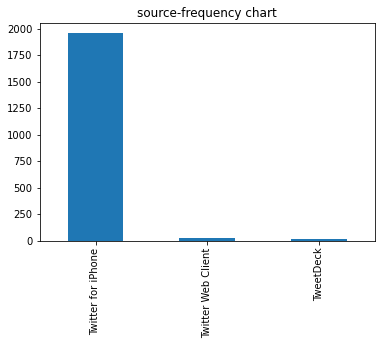

In [71]:
twitter_archive_master.source.value_counts().plot.bar(title = 'source-frequency chart')

#### From the graph above, it can be seen that data was gotten most from twitter for iPhone

In [72]:
twitter_archive_master.duplicated().unique()

array([False])

In [73]:
df = twitter_archive_master.img_num.value_counts()

In [74]:
df

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### The df obtained above is in a series form and then using the DataFrame method, converting it to dataframe

In [75]:
df = pd.DataFrame(df).reset_index()

In [76]:
df.columns = ['img_num', 'freq']

In [77]:
df

,img_num,freq
0,1,1780
1,2,198
2,3,66
3,4,31


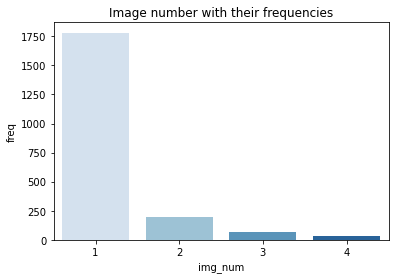

In [89]:
ax = sb.barplot(x="img_num", y="freq", data = df, palette='Blues').set(title='Image number with their frequencies')

### Insight 2: From the chart above, it can be established that the img_num 1 has highest frequency. This means that the image 1 has the largest population from the sources

### Insight 3: Numbers of predictions based on years

In [79]:
twitter_archive_master['year'] = pd.DatetimeIndex(twitter_archive_master['timestamp']).year

In [80]:
twitter_archive_master['year'].astype(str)

0       2015.0
1       2015.0
2       2015.0
3       2015.0
4       2015.0
         ...  
2070    2017.0
2071    2017.0
2072    2017.0
2073    2017.0
2074    2017.0
Name: year, Length: 2075, dtype: object

In [81]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   img_num             2075 non-null   int64  
 2   p1                  2075 non-null   object 
 3   p1_conf             2075 non-null   float64
 4   p1_dog              2075 non-null   bool   
 5   timestamp           1994 non-null   object 
 6   source              1994 non-null   object 
 7   text                1994 non-null   object 
 8   rating_numerator    1994 non-null   float64
 9   rating_denominator  1994 non-null   float64
 10  name                1350 non-null   object 
 11  dog_stages          306 non-null    object 
 12  favorite_count      2073 non-null   float64
 13  year                1994 non-null   float64
dtypes: bool(1), float64(5), int64(2), object(6)
memory usage: 212.9+ KB


In [82]:
year_rating = twitter_archive_master[['year', 'dog_stages']]

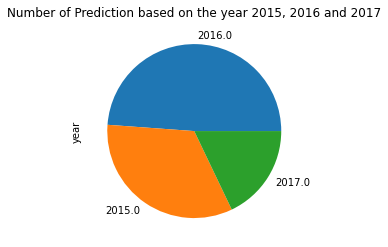

In [91]:
year_rating.year.value_counts().plot.pie(title = 'Number of Prediction based on the year 2015, 2016 and 2017')
plt.show()

### Insight 3: From the visual above, it can be seen that most data are from 2016